# Thema: Sentiment Analysis for Social Media Images
*                      **Nutzungs-Modell: VGG-16** 

In [ ]:
#Data aus GoogleDrive importieren
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_file="/content/drive/MyDrive/Data Sentiment Analysis/Group15_MacroProject_Datensatz.zip"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Bibliothek für Zip Dokument

In [ ]:
import zipfile
with zipfile.ZipFile(data_file,'r') as s:
  s.extractall()

Bibliothek und Package für die Visualisierung der Daten

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 1- Daten Vorbereitung 

1.	Train und Testdaten aus verschiedenen Kategorie definieren.

2.	Der Standort der Train/ Testbilder und der Name aller verschiedene Kategorien, die klassifiziert sein müssen.

3.	Anschließend zeichnet die Anzahl der Bilder pro Kategorie im Trainingssatz auf.

**Zum Beispiel:**

Training data:

•	data/train/Emotion_1(Zb: Happy)     : Images  von Emotion (Kategorie) 1

•	data/train/Emotion_2 (Zb: Sad)      : Images  von Emotion (Kategorie) 2

•	…………………………………..

Validation data:

•	data/valid/ Emotion_1(Zb: Happy)    : Images  von Emotion (Kategorie) 1

•	data/valid/ Emotion_2 (Zb: Sad)     : Images  von Emotion (Kategorie) 2

•	…………………………………..

Test data:

•	data/test/ Emotion_1 (Zb: Happy)      : Images  von Emotion (Kategorie) 1

•	data/test/ Emotion_2 (Zb: Sad)      : Images  von Emotion (Kategorie) 2



# 2-Data Visulisierung

Text(0.5, 1.0, 'Anzahl von Training_set Bilder pro Kategorie :')

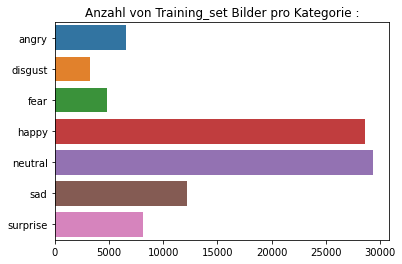

In [ ]:
train_data_dir = "./MMAFEDB/train/"
val_data_dir = "./MMAFEDB/valid"
test_data_dir = "./MMAFEDB/test/"
category_names = sorted(os.listdir('./MMAFEDB/train/'))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = './MMAFEDB/train/' + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Anzahl von Training_set Bilder pro Kategorie :")

**Interpretation der obigen Gaph:**

1-Happy und Neutral enthält von jede die großere Datenmenge: fast 30.000 Images.

2-Angry, Disgust, Fear haben eine Anzahl von Datenmenge zwieschen 2.500 und fast 7.000 Images.

3-Kritik: Nur mehr Trainingsdata bei “Happy und Neutral” Images.



**Einige Beispielbilder aus den verschiedenen Zeichenkategorien werden visualisieren**

***Sentiment Expression und ImageGenerator Verfahren***:

a-Daten werden auf den Link (Dataquelle) hochladen und der Zip-Ordner enthält die Trainingsdata , Validationsdata und Testsdata. 

b- In Python wird den Zip-Dokument durch die  Code ZipFile im lokalen Speicher  dekomprimieren.

c- Ein Ordner mit eienem anderen Sub-ordner wird hergestellt. Während es Training-Learning  in Tensorflow mit Hilfe der Methode“ ImageDataGenerator „ die Images automatisch verordnet wird:


     -ImageDataGenerator erzeugt  automatische Images mit Etikett aus Training und validationsdata .

     - Umstetzung ein Trainingsgenerator stellt die Trainingsdaten her.

     - Gleich Prozess wird mit der Validationdata durchgefürht.
     

     
![dataGenerator.PNG](attachment:dataGenerator.PNG)

**Image1:** ImageGenerator mit Tensorflow Verfahren, Source: selbst Darstellung

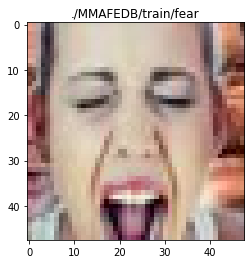

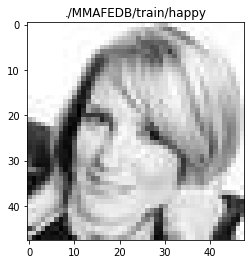

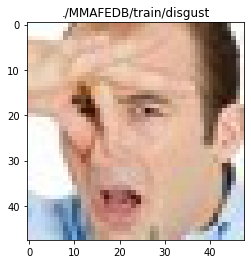

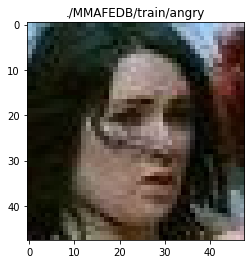

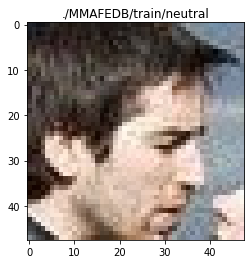

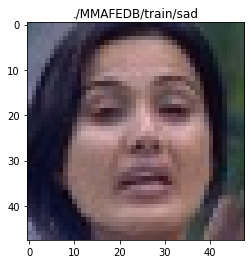

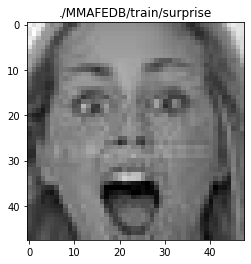

In [ ]:
#plot Bilder aus jede Klasse von Training_set
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img

for subdir, dirs, files in os.walk('./MMAFEDB/train/'):
    for file in files:
        img_file = subdir + '/' + file
        image = load_img(img_file)
        plt.figure()
        plt.title(subdir)
        plt.imshow(image)
        break

**Interpretation**: Wie man die obigen Bilder sehen kann, sind die Qualität der Image nicht so gut. Sowohl die Bildqualität und die Datenmenge in Praktischen Anwendungen des maschinelles Lernen häufig begrenzt. Daher stellt die Bilder mit geringe Qualität und die Emotion aus einige Bilder lass sich nicht gut in seine Kategorie( Zb: Bilder aus der Kategorie Disgust(in statt von neutrale) und Neutral(in statt Happy)) klassifizieren.

# 3-Architekture des Modells

Benötige Bibliothek und Package ,um das Model "VGG16" zu implementieren

In [ ]:
#package
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.preprocessing import image

from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras import layers, models, Model, optimizers

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
#  Create base model of VGG16
img_height, img_width = 48,48
conv_base = vgg16.VGG16(weights='imagenet', include_top=False,pooling='max',input_shape = (img_width, img_height, 3)) 
conv_base.summary()               

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

**Bemerkung:** das obigen Parameter der Code  «pooling =‘ max ’» 
Diese Code wurde da umgesetzt, damit die Basis Convolution des Models VGG16 einige vollstäntige Schichte bevor die ausgehende Layers verbunden hat(Originale Model VGG16). Wir haben ehe eine ausgehende Pooling Max (ausgenutzt für „Durchnitt zusammengesetzt“, denn hängt  dies für die Ausnutzung davon ab, wie es gut funktionnieren kann). Diese Verfahren ist eine alternative Benutzung der  vollständigen verbundene Layers für eine gute Transktion zwieschen die Variablen(Feature maps) zu den Ergebnisse der  Vorhersagen des Models.

In [ ]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f10c65fdf50> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f10c659df50> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f10c65b6e90> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f10b0172a10> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f10b017dc90> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f10b0181e90> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f10b017ad90> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f10b0184f50> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f10b0189090> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f10b018cad0> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f10c65325d0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f10b0117

Zur Kontrolle können wir auch eine Liste aller Layers des Modells prüfen, ob sie trainierbar sind oder nicht (Richtig / Falsch). Mit der Ergenisse können wir uns davon ergebt, dass alle Layers vollständig trainierbar sind.

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Dense(nb_categories, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 7)                 3591      
Total params: 14,718,279
Trainable params: 14,718,279
Non-trainable params: 0
_________________________________________________________________


Auf der Basis von VGG-16 Model wird die Erstellung der Layers (Schichte) durchgeführt. Die Parametern des Models sind zusammen mit den Parametern von Dense eingefügt. Wir können auch beobachtet, dass Anzahl der Klasse 7 ist.

In [ ]:
#Number of images to load at each iteration
batch_size = 32
# only rescaling
train_datagen =  ImageDataGenerator(
    rescale=1./255
)
test_datagen =  ImageDataGenerator(
    rescale=1./255
)
# these are generators for train/test data that will read pictures #found in the defined subfolders of 'data/'
print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)

Total number of images for "training":
Found 92968 images belonging to 7 classes.
Total number of images for "validation":
Found 17356 images belonging to 7 classes.
Total number of images for "testing":
Found 17356 images belonging to 7 classes.


Aus den Ausgabe können wir hervorgehen, dass die Anzahl der Bildern aus Training 92968 ist und die Total Menge der Bildern aus Validation ist 17356 und auch 17356 bei der Bildern aus Testing

In [ ]:
# Compile the model.
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
  # optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])

In [ ]:
epochs = 10
checkpoint = ModelCheckpoint("sentiment_vgg16.h1", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [ ]:

history = model.fit_generator(train_generator, 
                              epochs=epochs, 
                              shuffle=True, 
                              validation_data=val_generator,
                              callbacks=[checkpoint]
                              )


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
2906/2906 [==============================] - 152s 40ms/step - loss: 1.7507 - acc: 0.3112 - val_loss: 1.6269 - val_acc: 0.3364

Epoch 00001: val_acc improved from -inf to 0.33643, saving model to sentiment_vgg16.h1
INFO:tensorflow:Assets written to: sentiment_vgg16.h1/assets
Epoch 2/10
2906/2906 [==============================] - 117s 40ms/step - loss: 1.6657 - acc: 0.3145 - val_loss: 1.6245 - val_acc: 0.3364

Epoch 00002: val_acc did not improve from 0.33643
Epoch 3/10
2906/2906 [==============================] - 119s 41ms/step - loss: 1.6638 - acc: 0.3122 - val_loss: 1.6223 - val_acc: 0.3364

Epoch 00003: val_acc did not improve from 0.33643
Epoch 4/10
2906/2906 [==============================] - 117s 40ms/step - loss: 1.6665 - acc: 0.3150 - val_loss: 1.6211 - val_acc: 0.3364

Epoch 00004: val_acc did not improve from 0.33643
Epoch 5/10
2906/2906 [==============================] - 117s 40ms/step - loss: 1.6674 - acc: 0.3115 - val_loss: 1.6243 - val_acc: 0.3364

Epoch 00005:

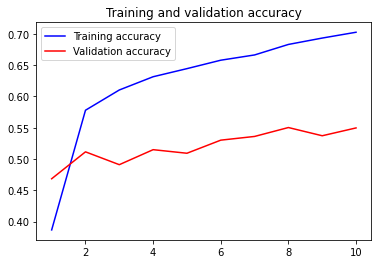

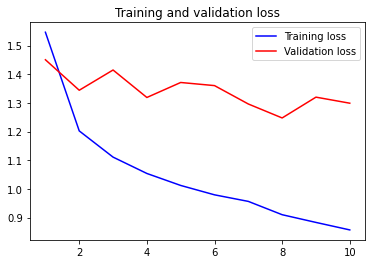

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.figure()
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('Accuracy.jpg')
plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('Loss.jpg')

***Interpretion des Graphs:***

Mit der ersten Firgure sehen wir die Präzision (Accuracy) von Train/validationset (Blau line).Diese Line ist die Messen der Performance(Accuracy) über der Training Images und wir sehen eine Steigerung den Werte fast 70% (das bedeutet, dass die Images aus Training  fast 70% gut klassifiziert ist). Während der  Messung der Präzision von  Validation über 55 % nicht überschreitten kann. Das heißt, dass die Optimierung des Models nicht über 55% erreichen kann. Es gibt eine große Abstand zwieschen die Kurve von Training und die Validation. Um besser die Präzision(Accuracy ) zu unterschiedlische Klasse zu verstehen, werden wir eine andere Messungen mit Hilfe von  „Confusion Matrix“ rechnen. Denn diese erklärt besser die Evaluierung der Präzision unser Modell.

# 4- Modell evaluieren 

die folgende Code wird die Tabelle "Confusion Matrix" dargestellt

In [ ]:
#confusion_matrix
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, figname, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
 '''
 This function prints and plots the confusion matrix.
 Normalization can be applied by setting `normalize=True`.
 '''
 import numpy as np
 import matplotlib.pyplot as plt
 import itertools
 if normalize:
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  print('Normalized confusion matrix')
 else:
  print('Confusion matrix, without normalization')
 plt.figure(figsize=(8,8))
 plt.imshow(cm, interpolation='nearest', cmap=cmap)
 plt.title(title)
 #plt.colorbar()
 tick_marks = np.arange(len(classes))
 plt.xticks(tick_marks, classes, rotation=90)
 plt.yticks(tick_marks, classes)
 fmt = '.2f' if normalize else 'd'
 thresh = cm.max() / 2.
 for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()
  plt.savefig(figname)

Confusion matrix, without normalization


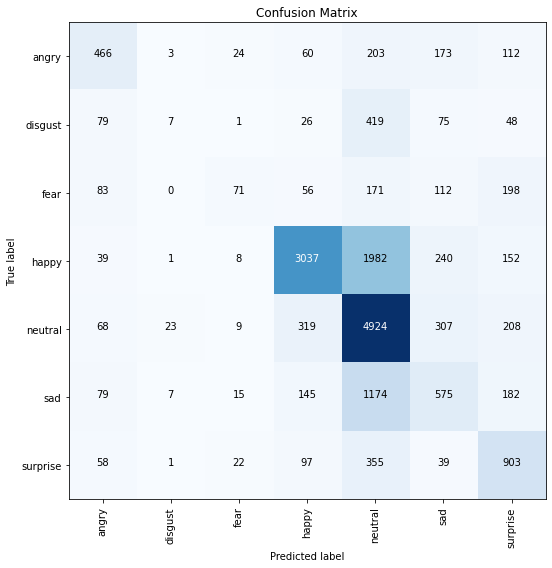

In [ ]:
# confusion Matrix darstellen
plot_confusion_matrix(cm, classes = category_names, title='Confusion Matrix', normalize=False, figname = 'Confusion_matrix_vgg16.jpg')

Wie die obigen "confusion matrx" hervorgeht, war die HaubptKategorie, die das Model Falsch klassifiziert hat, "Happy", "Neutral", wobei 1819 Bilder aus Happy von Neutral verwechselt wird. Wir rechnen die Präzision Testset

In [ ]:
accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 57.5% 


Recall= true positive/( true positive+ false negative)

Accuracy= (true positive+ true negative) /( true positive+ false positive+true positive+ false negative)


In [ ]:
from sklearn.metrics import recall_score
# calculate recall
recall = recall_score(test_generator.classes, y_pred,average='micro')
print('Recall: %.3f %%' % (recall*100))

Recall: 57.519 %


Die Performance unsere Testset ergibt eine Ausgabe von 53,1%. Was es nicht so schlecht. Aber wir können mit dem Verfahren "Bildvergroßerung" diese Performance verbessern.

# 4.1 Modell mit Bildvergrößerung

In [ ]:
conv_base = vgg16.VGG16(weights='imagenet', include_top=False, pooling='max', input_shape = (img_width, img_height, 3))

#for layer in conv_base.layers[:-13]:
#    layer.trainable = False
model = models.Sequential()
model.add(conv_base)
model.add(layers.Dense(nb_categories, activation='softmax'))

Die Methode Bildsvergroßerung vergroßert die Pixel von jede Image, sodass unser Model VGG-16 alle orientierte Form einer Image beobarten und analysieren kann.

In [ ]:
#Bildsvergroßerung
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        brightness_range = (0.9,1.1),
        fill_mode='nearest'
        )

# Dies ist ein Generator, der Bilder liest, die in gefunden wurden
# Unterordner von 'data / train' und unbegrenzt generieren
# Stapel erweiterter Bilddaten

train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
#save_to_dir='augm_images', 
save_prefix='aug', 
save_format='jpg',
class_mode = "categorical")

Found 92968 images belonging to 7 classes.


In [ ]:
#Train new model using augmented data
epochs = 20
checkpoint = ModelCheckpoint("sentiment_vgg16.new_augm.h1", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['acc'])

history = model.fit_generator(train_generator, 
                              epochs=epochs, 
                              shuffle=True, 
                              validation_data=test_generator,
                              callbacks=[checkpoint]
                              )

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


2906/2906 [==============================] - 262s 90ms/step - loss: 1.6489 - acc: 0.3179 - val_loss: 1.5346 - val_acc: 0.3475

Epoch 00001: val_acc improved from -inf to 0.34755, saving model to sentiment_vgg16.new_augm.h1
INFO:tensorflow:Assets written to: sentiment_vgg16.new_augm.h1/assets
Epoch 2/20
2906/2906 [==============================] - 262s 90ms/step - loss: 1.5482 - acc: 0.3575 - val_loss: 1.4737 - val_acc: 0.4597

Epoch 00002: val_acc improved from 0.34755 to 0.45973, saving model to sentiment_vgg16.new_augm.h1
INFO:tensorflow:Assets written to: sentiment_vgg16.new_augm.h1/assets
Epoch 3/20
2906/2906 [==============================] - 262s 90ms/step - loss: 1.2567 - acc: 0.5512 - val_loss: 1.3105 - val_acc: 0.5251

Epoch 00003: val_acc improved from 0.45973 to 0.52506, saving model to sentiment_vgg16.new_augm.h1
INFO:tensorflow:Assets written to: sentiment_vgg16.new_augm.h1/assets
Epoch 4/20
2906/2906 [==============================] - 262s 90ms/step - loss: 1.1611 - acc: 

In [ ]:
#Plot the learning curves:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.figure()
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
#plt.savefig('Accuracy_Augmented.jpg')

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
#plt.savefig('Loss_Augmented.jpg')

NameError: ignored

**Interpretion des Graphs:**
    
Mit den ersten Graph, sieht die Präzision (Accuracy) von Train/validationset eine Steigerung den Werte
fast 65% (das bedeutet, dass die Images aus Training  fast 65% gut klassifiziert ist). 
Während der  Messung der Präzision von  Validation über 60 % nicht überschreitten kann. 
Das heißt, dass die Optimierung des Models nicht über 60% erreichen kann. 
Es gibt eine nicht große Abstand zwieschen die Kurve von Training und die Validation. 
Um besser die Präzision (Accuracy ) zu unterschiedlische Klasse zu verstehen, 
werden wir eine andere Messungen mit Hilfe von  „Confusion Matrix“ rechnen.
Denn diese erklärt besser die Evaluierung der Präzision unser Modell.

Confusion matrix, without normalization


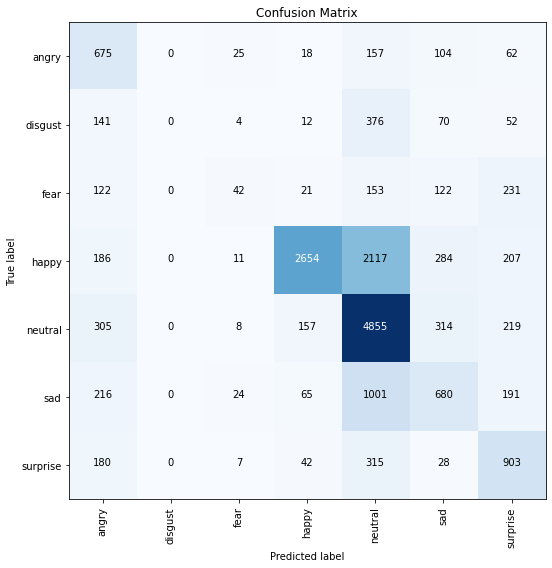

In [ ]:
#Calculate and plot confusion matrix:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm_aug = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm_aug, classes = category_names, title='Confusion Matrix', normalize=False, figname = 'Confusion_matrix_Augm.jpg')

wie die obigen "confusion matrx" hervorgeht, war die Hauptkategorie, die das Modell Falsch klassifiziert hat.In der Kategorie "Happy" und "Neutral", wobei 2117 Bilder aus Happy falsh klassifiziert wird. Wir rechnen die  Genauigkeit von unserem Testset.

In [ ]:
from sklearn.metrics import recall_score
# calculate recall
recall = recall_score(test_generator.classes, y_pred,average='micro')
print('Recall: %.3f %%' % (recall*100))

Recall: 56.516 %


In [ ]:
#Calculate the final accuracy, as evaluated on the test set:
accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 56.5% 


Dies ergibt eine Leistung von 56,51%, was eine Verbesserung gegenüber unserem ursprünglichen Modell ohne vergrößerung des Bilders darstellt!

In [ ]:
#model sentiment_vgg16.new_augm.h1 hochladen
model = models.load_model("sentiment_vgg16.new_augm.h1")

In [ ]:
# Bewertung der Modellgenauigkeit:
# Zeichnen Sie einige Bilder aus dem Testsatz und vergleichen Sie die Modellvorhersage mit der Grundwahrheit:
test_subset_data_dir = "./MMAFEDB/test/"

test_subset_generator = test_datagen.flow_from_directory(
test_subset_data_dir,
batch_size = batch_size,
target_size = (img_height, img_width),
class_mode = "categorical",
shuffle=False)

Found 17356 images belonging to 7 classes.


In [ ]:
Y_pred = model.predict_generator(test_subset_generator)
y_pred = np.argmax(Y_pred, axis=1)

Vorhersagen der Bilder aus Testdada implementiren

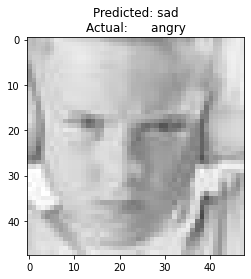

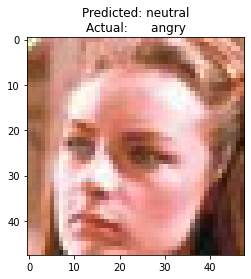

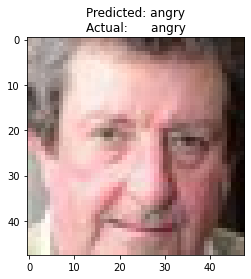

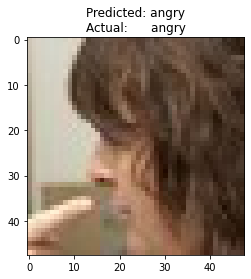

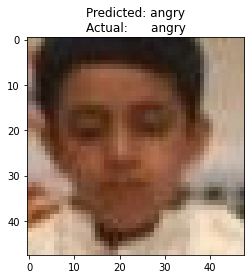

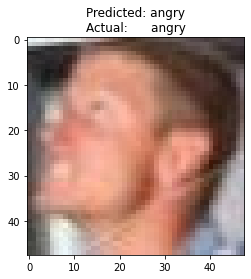

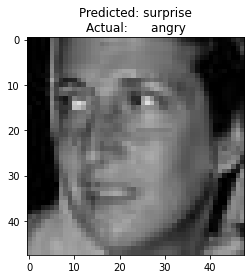

In [ ]:
img_nr = 0
for subdir, dirs, files in os.walk('./MMAFEDB/test/'):
    for file in files:
        img_file = subdir + '/' + file
        image = load_img(img_file,target_size=(img_height, img_width))
        pred_emotion = category_names[y_pred[img_nr]]
        real_emotion = category_names[test_subset_generator.classes[img_nr]]
        plt.figure()
        plt.title('Predicted: ' + pred_emotion + '\n' + 'Actual:      ' + real_emotion)
        plt.imshow(image)
        img_nr = img_nr +1
        break
